<h1 align="center"> <span style="font-size: 20px;"> Proyecto Final Grupo Nº 7 </span> <br>
    <align="center"> <span style="font-size: 15px;">  Proyecto Yelp & Google Maps - Reviewa y Recomendaciones</span><br>         
<align="center"> <span style="font-size: 15px;">@utores:  Javier Castro, Luca Ramallo, Luis Ramírez, Lesmen García.</span> <br>
  <a href="https://github.com/lesmengp/Proyecto-Final-Grupo-07.git">GitHub: <span style="font-size: 20px;">Proyecto Yelp & Google Maps</span></a> 
</h1>

# Analisis del Dataset: 'yelp_business'

# 1) Extracción Transformación y Carga (ETL)

### Librerías a Utilizar:

In [2]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 10.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.1 MB/s eta 0:00:00
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/8f/3e/4b8b40eb3c80aeaf360f0361d956d129bb3d23b2a3ecbe3a04a8f3bdd6d3/regex-2023.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 49.0 MB/s eta 0:00:00


In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import json
import gcsfs
import ast
from textblob import TextBlob   #0.17.1

### Definición de Funciones

In [72]:
#############################################
### Funcion para Visualizar Valores Nulos ###
#############################################

def ValoresNulos(columnas,datasets):
    for dataset in datasets:
        df = globals()[dataset]
        print(f"Información del DataSets: {datasets}")
        print("="*80)
        for columna in columnas:
            print(f"Analizando los Valores Nulos en la Columna:   '{columna}'")
            print(f"Total Registros: {df.shape[0]}")
            print(f"Total Valores Nulos: {df[columna].isna().sum()}")
            print(f"Porcentaje Valores Nulos: {round((df[columna].isna().sum()/df.shape[0])*100,3)} %")
            print("="*80)
            
            
#####################################################
### Funcion para Eliminar Filas con Valores Nulos ###
#####################################################

def EliminarRegistrosValoresNulos(columnas,datasets):
    for dataset in datasets:
        for columna in columnas:
            df = globals()[dataset]
            df.dropna(subset=columna, inplace=True)
    df.info()
    
    
#################################################
### Funcion para Visualizar Columnas Anidadas ###
#################################################

def VisualizarColumnas(columnas,datasets):
    pd.set_option('display.max_colwidth', None)
    for dataset in datasets:
        for columna in columnas:
            df = globals()[dataset]
            print(f"{df[columna]}\n")
            print(f"Tipo de Columna:, {type(df[columna])}")
            print("="*80)
    pd.reset_option('display.max_colwidth')

### Cargando Dataset Original: 'bussines.pkl'

In [68]:
### Cargando el EDA del Dataset 'yelp_bussines.parquet'
# Ruta completa en Cloud Storage
#ruta_eda_datalike = "gs://gmy/eda/yelp_bussines.parquet"
ruta_eda_datalike = "gs://gmy/Yelp/business.pkl"

# Lee el archivo Parquet directamente en un DataFrame de pandas
df_business_yelp = pd.read_pickle(ruta_eda_datalike, storage_options={"project": "Proyecto Final - Henry"})
df_business_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

### Eliminando Columnas Repetidas

In [69]:
### Eliminando Columnas Repetidas
df_business_yelp = df_business_yelp.iloc[:, 0:14]
print(df_business_yelp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB
None


### 1) Convertiendo los formatos de las columnas a sus respectivos tipos

In [70]:
### Convirtiendo columnas a sus tipos de datos respectivos.
df_business_yelp['latitude'] = pd.to_numeric(df_business_yelp['latitude'], errors='coerce')
df_business_yelp['longitude'] = pd.to_numeric(df_business_yelp['longitude'], errors='coerce')
df_business_yelp['stars'] = pd.to_numeric(df_business_yelp['stars'], errors='coerce')
df_business_yelp['review_count'] = pd.to_numeric(df_business_yelp['review_count'], errors='coerce', downcast='integer')
df_business_yelp['is_open'] = pd.to_numeric(df_business_yelp['is_open'], errors='coerce', downcast='integer')
print(df_business_yelp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int16  
 10  is_open       150346 non-null  int8   
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int16(1), int8(1), object(9)
memory usage: 15.3+ MB
None


### 2.- Eliminación Valores Nulos

In [46]:
### Identificando Columnas con Valores Nulos
df_business_yelp.isna().sum()

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

### Estadísticas Columnas con Valores Nulos

In [73]:
### Analisis Valores Nulos
Columnas = ['state', 'attributes', 'categories', 'hours']
DataSets = ['df_business_yelp']
ValoresNulos = ValoresNulos(Columnas,DataSets)

Información del DataSets: ['df_business_yelp']
Analizando los Valores Nulos en la Columna:   'state'
Total Registros: 150346
Total Valores Nulos: 3
Porcentaje Valores Nulos: 0.002 %
Analizando los Valores Nulos en la Columna:   'attributes'
Total Registros: 150346
Total Valores Nulos: 13744
Porcentaje Valores Nulos: 9.142 %
Analizando los Valores Nulos en la Columna:   'categories'
Total Registros: 150346
Total Valores Nulos: 103
Porcentaje Valores Nulos: 0.069 %
Analizando los Valores Nulos en la Columna:   'hours'
Total Registros: 150346
Total Valores Nulos: 23223
Porcentaje Valores Nulos: 15.446 %


Análisis de las columnas con valores nulos:<Br>
Se procede a eliminar los registros con valores nulos de la columna 'state' ya que representa un porcentaje muy pequeño (0.002%)<Br>
Se procede a eliminar 13744 registros con valores nulos de las columnas 'attributes' (9.142 %)<Br>
Se procede a eliminar 103 registros con valores nulos de la columna 'categories' (0.069 %) <Br>
La columna 'hours' tiene 23223 valores nulos (15.446 %). Como dicha columna representa el horario que esta abierto, es muy posible que estos valores nulos se refieren a que no tienen informacion al respecto. 

### Eliminando los registros con valones nulos de las siguientes columnas:

In [74]:
### Eliminación Registros con Valores Nulos
Columnas = ['state', 'attributes', 'categories', 'hours']
DataSets = ['df_business_yelp']
EliminandoRegistrosConValoresNulos = EliminarRegistrosValoresNulos(Columnas,DataSets)

### Validando Columnas con Valores Nulos
df_business_yelp.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 117616 entries, 3 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   117616 non-null  object 
 1   name          117616 non-null  object 
 2   address       117616 non-null  object 
 3   city          117616 non-null  object 
 4   state         117616 non-null  object 
 5   postal_code   117616 non-null  object 
 6   latitude      117616 non-null  float64
 7   longitude     117616 non-null  float64
 8   stars         117616 non-null  float64
 9   review_count  117616 non-null  int16  
 10  is_open       117616 non-null  int8   
 11  attributes    117616 non-null  object 
 12  categories    117616 non-null  object 
 13  hours         117616 non-null  object 
dtypes: float64(3), int16(1), int8(1), object(9)
memory usage: 12.0+ MB


business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

In [11]:
### Reseteando lo sindices despues de la eliminacion de las columnas
df_business_yelp = df_business_yelp.reset_index(drop=True)
df_business_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117616 entries, 0 to 117615
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   117616 non-null  object 
 1   name          117616 non-null  object 
 2   address       117616 non-null  object 
 3   city          117616 non-null  object 
 4   state         117616 non-null  object 
 5   postal_code   117616 non-null  object 
 6   latitude      117616 non-null  float64
 7   longitude     117616 non-null  float64
 8   stars         117616 non-null  float64
 9   review_count  117616 non-null  int16  
 10  is_open       117616 non-null  int8   
 11  attributes    117616 non-null  object 
 12  categories    117616 non-null  object 
 13  hours         117616 non-null  object 
dtypes: float64(3), int16(1), int8(1), object(9)
memory usage: 11.1+ MB


# 2) Analisís Exploratorios de los Datos (EDA)

In [12]:
### Columnas Anidadas
df_business_yelp[['attributes','categories','hours']]

,attributes,categories,hours
0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
2,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
3,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
4,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
...,...,...,...
117611,"{'Ambience': '{'touristy': False, 'hipster': F...","Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
117612,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
117613,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
117614,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


## 1) Desanidar las columnas: 'categories', 'attributes' y 'hours' 

### 1.1) Desanidando la columna: 'categories'

In [14]:
### Visualizando Columnas a lo ancho
Columnas = ['categories']
DataSets = ['df_business_yelp']
VisualizandoColumnas = VisualizarColumnas(Columnas,DataSets)

0                                             Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries
1                                                                         Brewpubs, Breweries, Food
2                      Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants
3                          Sporting Goods, Fashion, Shoe Stores, Shopping, Sports Wear, Accessories
4                                  Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food
                                                    ...                                            
117611                                                                  Middle Eastern, Restaurants
117612                                                                   Nail Salons, Beauty & Spas
117613    Pets, Nurseries & Gardening, Pet Stores, Hobby Shops, Bird Shops, Home & Garden, Shopping
117614             Fitness/Exercise Equipment, Eyewear & Opticians, Shopping, Sporting Goods, Bikes


### Listado de Todas las Categorias Unicas

In [15]:
### Listado de Todas las Categorias Unicas

# Paso 1: Concatenar todas las categorías en una sola cadena
todas_las_categorias = ', '.join(df_business_yelp['categories'])

# Paso 2: Separar las categorías utilizando comas
categorias_separadas = todas_las_categorias.split(', ')

# Paso 3: Obtener un conjunto de categorías únicas
categories_unicas = set(categorias_separadas)

# Listado único de todos los atributos presentes en la columna 'categories'.
print("Total de Categorias: ", len(categories_unicas))
print("="*28)

list(categories_unicas)[:30]

Total de Categorias:  1291


['Veterinarians',
 'Cheerleading',
 'Crane Services',
 'Parenting Classes',
 'Amateur Sports Teams',
 'Carpet Cleaning',
 'Luggage',
 'Musical Instruments & Teachers',
 'IV Hydration',
 'Music Venues',
 'Furniture Assembly',
 'Real Estate Photography',
 'Cucina campana',
 'Valet Services',
 'Ski Resorts',
 'Radiologists',
 'Summer Camps',
 'Aviation Services',
 'Thrift Stores',
 'Fireworks',
 'Nanny Services',
 'Funeral Services & Cemeteries',
 'Bail Bondsmen',
 'Dermatologists',
 'Criminal Defense Law',
 'Tanning',
 'Damage Restoration',
 'Pet Transportation',
 'Ski & Snowboard Shops',
 'Marinas']

### Listado de Categorias y número de veces que aparecen en el Dataset

In [16]:
# Paso 1: Concatenar todas las categorías en una sola cadena
todas_las_categorias = ', '.join(df_business_yelp['categories'])

# Paso 2: Separar las categorías utilizando comas
categorias_separadas = todas_las_categorias.split(', ')

# Obtener un conteo de categorías únicas
total_categorias = pd.Series(categorias_separadas).value_counts()

# Listado único de todos los atributos presentes en la columna 'categories'.
print("Total de Categorias;", len(total_categorias))
print("="*28)
print(total_categorias)

Total de Categorias; 1291
Restaurants        44676
Food               23910
Shopping           21052
Beauty & Spas      12038
Home Services      11760
                   ...  
Lahmacun               1
Water Suppliers        1
Bus Stations           1
Beach Bars             1
Bubble Soccer          1
Name: count, Length: 1291, dtype: int64


In [17]:
df_business_yelp[df_business_yelp['categories'].str.contains("Restaurants|Food")]['categories']

0         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
1                                 Brewpubs, Breweries, Food
2         Burgers, Fast Food, Sandwiches, Food, Ice Crea...
4         Ice Cream & Frozen Yogurt, Fast Food, Burgers,...
6                Vietnamese, Food, Restaurants, Food Trucks
                                ...                        
117600    Cafes, Juice Bars & Smoothies, Coffee & Tea, R...
117601    Specialty Food, Food, Coffee & Tea, Coffee Roa...
117608                                 Restaurants, Mexican
117610    Restaurants, Comfort Food, Food, Food Trucks, ...
117611                          Middle Eastern, Restaurants
Name: categories, Length: 54789, dtype: object

### ### Desanidar Columna de Categorias 'categories'

In [75]:
### Desanidando Columna de Categorias 'categories'

categorias = df_business_yelp['categories'].str.split(',', expand=True)
categorias = categorias.iloc[:, 0:4]
categorias.columns =['Categoria1','Categoria2','Categoria3','Categoria4']
df_business_yelp = pd.concat([df_business_yelp,categorias], axis=1)
df_business_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117616 entries, 3 to 150345
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   117616 non-null  object 
 1   name          117616 non-null  object 
 2   address       117616 non-null  object 
 3   city          117616 non-null  object 
 4   state         117616 non-null  object 
 5   postal_code   117616 non-null  object 
 6   latitude      117616 non-null  float64
 7   longitude     117616 non-null  float64
 8   stars         117616 non-null  float64
 9   review_count  117616 non-null  int16  
 10  is_open       117616 non-null  int8   
 11  attributes    117616 non-null  object 
 12  categories    117616 non-null  object 
 13  hours         117616 non-null  object 
 14  Categoria1    117616 non-null  object 
 15  Categoria2    117570 non-null  object 
 16  Categoria3    97943 non-null   object 
 17  Categoria4    78744 non-null   object 
dtypes: float6

In [19]:
df_business_yelp.shape

(117616, 18)

In [76]:
df_business_yelp[['Categoria1', 'Categoria2', 'Categoria3', 'Categoria4']]

,Categoria1,Categoria2,Categoria3,Categoria4
3,Restaurants,Food,Bubble Tea,Coffee & Tea
4,Brewpubs,Breweries,Food,None
5,Burgers,Fast Food,Sandwiches,Food
6,Sporting Goods,Fashion,Shoe Stores,Shopping
9,Ice Cream & Frozen Yogurt,Fast Food,Burgers,Restaurants
...,...,...,...,...
150340,Middle Eastern,Restaurants,None,None
150341,Nail Salons,Beauty & Spas,None,None
150342,Pets,Nurseries & Gardening,Pet Stores,Hobby Shops
150344,Fitness/Exercise Equipment,Eyewear & Opticians,Shopping,Sporting Goods


In [62]:


# Define una función para intercambiar 'Restaurant' en la columna Categoria2
def exchange_restaurant(row):
    if row['Categoria2'] is not None and 'Restaurant' in row['Categoria2']:
        row['Categoria2'], row['Categoria1'] = row['Categoria1'], row['Categoria2']
    return row

# Aplica la función a cada fila del DataFrame
df_business_yelp = df_business_yelp.apply(exchange_restaurant, axis=1)



In [63]:
df_business_yelp[['Categoria1', 'Categoria2', 'Categoria3', 'Categoria4']]

,Categoria1,Categoria2,Categoria3,Categoria4
3,Restaurants,Food,Bubble Tea,Coffee & Tea
4,Brewpubs,Breweries,Food,None
5,Burgers,Fast Food,Sandwiches,Food
6,Sporting Goods,Fashion,Shoe Stores,Shopping
9,Ice Cream & Frozen Yogurt,Fast Food,Burgers,Restaurants
...,...,...,...,...
150340,Restaurants,Middle Eastern,None,None
150341,Nail Salons,Beauty & Spas,None,None
150342,Pets,Nurseries & Gardening,Pet Stores,Hobby Shops
150344,Fitness/Exercise Equipment,Eyewear & Opticians,Shopping,Sporting Goods


In [64]:


# Define una función para intercambiar 'Restaurant' en la columna Categoria2
def exchange_restaurant(row):
    if row['Categoria2'] is not None and 'Restaurant' in row['Categoria2']:
        row['Categoria2'], row['Categoria1'] = row['Categoria1'], row['Categoria2']
    if row['Categoria3'] is not None and 'Restaurant' in row['Categoria3']:
        row['Categoria3'], row['Categoria1'] = row['Categoria1'], row['Categoria3']
    return row

# Aplica la función a cada fila del DataFrame
df_business_yelp = df_business_yelp.apply(exchange_restaurant, axis=1)


In [65]:
df_business_yelp[['Categoria1', 'Categoria2', 'Categoria3', 'Categoria4']]

,Categoria1,Categoria2,Categoria3,Categoria4
3,Restaurants,Food,Bubble Tea,Coffee & Tea
4,Brewpubs,Breweries,Food,None
5,Burgers,Fast Food,Sandwiches,Food
6,Sporting Goods,Fashion,Shoe Stores,Shopping
9,Ice Cream & Frozen Yogurt,Fast Food,Burgers,Restaurants
...,...,...,...,...
150340,Restaurants,Middle Eastern,None,None
150341,Nail Salons,Beauty & Spas,None,None
150342,Pets,Nurseries & Gardening,Pet Stores,Hobby Shops
150344,Fitness/Exercise Equipment,Eyewear & Opticians,Shopping,Sporting Goods


In [77]:

# Define una función para intercambiar 'Restaurant' en la columna Categoria2
def exchange_restaurant(row):
    if row['Categoria2'] is not None and 'Restaurant' in row['Categoria2']:
        row['Categoria2'], row['Categoria1'] = row['Categoria1'], row['Categoria2']
    if row['Categoria3'] is not None and 'Restaurant' in row['Categoria3']:
        row['Categoria3'], row['Categoria1'] = row['Categoria1'], row['Categoria3']
    if row['Categoria4'] is not None and 'Restaurant' in row['Categoria4']:
        row['Categoria4'], row['Categoria1'] = row['Categoria1'], row['Categoria4']
    return row

# Aplica la función a cada fila del DataFrame
df_business_yelp = df_business_yelp.apply(exchange_restaurant, axis=1)

In [78]:
df_business_yelp[['Categoria1', 'Categoria2', 'Categoria3', 'Categoria4']]

,Categoria1,Categoria2,Categoria3,Categoria4
3,Restaurants,Food,Bubble Tea,Coffee & Tea
4,Brewpubs,Breweries,Food,None
5,Burgers,Fast Food,Sandwiches,Food
6,Sporting Goods,Fashion,Shoe Stores,Shopping
9,Restaurants,Fast Food,Burgers,Ice Cream & Frozen Yogurt
...,...,...,...,...
150340,Restaurants,Middle Eastern,None,None
150341,Nail Salons,Beauty & Spas,None,None
150342,Pets,Nurseries & Gardening,Pet Stores,Hobby Shops
150344,Fitness/Exercise Equipment,Eyewear & Opticians,Shopping,Sporting Goods


In [82]:


# Define una función para intercambiar 'Food' en la columna Categoria2
def exchange_food(row):
    if row['Categoria2'] and 'Food' in row['Categoria2'] and (not row['Categoria1'] or 'Restaurant' not in row['Categoria1']):
        row['Categoria2'], row['Categoria1'] = row['Categoria1'], row['Categoria2']
    if row['Categoria3'] and 'Food' in row['Categoria3'] and (not row['Categoria1'] or 'Restaurant' not in row['Categoria1']):
        row['Categoria3'], row['Categoria1'] = row['Categoria1'], row['Categoria3']
    if row['Categoria4'] and 'Food' in row['Categoria4'] and (not row['Categoria1'] or 'Restaurant' not in row['Categoria1']):
        row['Categoria4'], row['Categoria1'] = row['Categoria1'], row['Categoria4']
    return row

# Aplica la función a cada fila del DataFrame
df_business_yelp = df_business_yelp.apply(exchange_food, axis=1)


In [83]:
df_business_yelp[['Categoria1', 'Categoria2', 'Categoria3', 'Categoria4']]

,Categoria1,Categoria2,Categoria3,Categoria4
3,Restaurants,Food,Bubble Tea,Coffee & Tea
4,Food,Breweries,Brewpubs,None
5,Food,Burgers,Sandwiches,Fast Food
6,Sporting Goods,Fashion,Shoe Stores,Shopping
9,Restaurants,Fast Food,Burgers,Ice Cream & Frozen Yogurt
...,...,...,...,...
150340,Restaurants,Middle Eastern,None,None
150341,Nail Salons,Beauty & Spas,None,None
150342,Pets,Nurseries & Gardening,Pet Stores,Hobby Shops
150344,Fitness/Exercise Equipment,Eyewear & Opticians,Shopping,Sporting Goods


In [84]:
# Cuenta la cantidad de registros que tienen 'Restaurant' en 'Categoria1'
restaurant_count = df_business_yelp['Categoria1'].str.contains('Restaurant').sum()

# Cuenta la cantidad de registros que tienen 'Food' en 'Categoria1'
food_count = df_business_yelp['Categoria1'].str.contains('Food').sum()

# Suma de ambos conteos
total_count = restaurant_count + food_count

print("Cantidad de registros con 'Restaurant' en Categoria1:", restaurant_count)
print("Cantidad de registros con 'Food' en Categoria1:", food_count)
print("Total de registros con 'Restaurant' o 'Food' en Categoria1:", total_count)


Cantidad de registros con 'Restaurant' en Categoria1: 37054
Cantidad de registros con 'Food' en Categoria1: 12586
Total de registros con 'Restaurant' o 'Food' en Categoria1: 49640


In [87]:
# Filtra los registros que contienen 'Restaurant' o 'Food' en 'Categoria1'
df_ML = df_business_yelp[df_business_yelp['Categoria1'].str.contains('Restaurants|Food')]

# Muestra el nuevo DataFrame filtrado
df_ML.shape


(49640, 18)

In [93]:
df_ML[['Categoria1', 'Categoria2', 'Categoria3', 'Categoria4']]

,Categoria1,Categoria2,Categoria3,Categoria4
3,Restaurants,Food,Bubble Tea,Coffee & Tea
4,Food,Breweries,Brewpubs,None
5,Food,Burgers,Sandwiches,Fast Food
9,Restaurants,Fast Food,Burgers,Ice Cream & Frozen Yogurt
11,Restaurants,Food,Vietnamese,Food Trucks
...,...,...,...,...
150327,Restaurants,Juice Bars & Smoothies,Coffee & Tea,Cafes
150328,Specialty Food,Food,Coffee & Tea,Coffee Roasteries
150336,Restaurants,Mexican,None,None
150339,Restaurants,Comfort Food,Food,Food Trucks


In [110]:
# Limpiar los valores de 'Categoria1' eliminando espacios en blanco adicionales
df_ML['Categoria1'] = df_ML['Categoria1'].str.strip()

# Categorias Unicas
total_categorias_unicas = df_ML['Categoria1'].nunique()
print("Total de Categorias Únicas en 'Categoria1':", total_categorias_unicas)

# Mostrar los elementos únicos y su frecuencia
#print(categoria1_counts)

# Total de Registros de las Categorias Unica
registros_totales = df_ML['Categoria1'].value_counts().sum()
print("Total de Registros:", registros_totales)

print("="*50)

# Contar la frecuencia de cada elemento en 'Categoria1' después de la limpieza
categoria1_counts = df_ML['Categoria1'].value_counts()
print(categoria1_counts)



Total de Categorias Únicas en 'Categoria1': 18
Total de Registros: 49640
Categoria1
Restaurants               37012
Food                      10336
Specialty Food             1074
Fast Food                   462
Food Delivery Services      176
Food Trucks                 142
Comfort Food                111
Ethnic Food                 100
Soul Food                    39
Do-It-Yourself Food          34
Food Stands                  34
Imported Food                30
Pop-Up Restaurants           29
Food Tours                   25
Live/Raw Food                17
Restaurant Supplies          13
Food Court                    5
Food Banks                    1
Name: count, dtype: int64


/var/tmp/ipykernel_100506/1050124463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Categoria1'] = df_ML['Categoria1'].str.strip()


In [112]:
df_ML[['Categoria1', 'Categoria2', 'Categoria3', 'Categoria4']]

,Categoria1,Categoria2,Categoria3,Categoria4
3,Restaurants,Food,Bubble Tea,Coffee & Tea
4,Food,Breweries,Brewpubs,None
5,Food,Burgers,Sandwiches,Fast Food
9,Restaurants,Fast Food,Burgers,Ice Cream & Frozen Yogurt
11,Restaurants,Food,Vietnamese,Food Trucks
...,...,...,...,...
150327,Restaurants,Juice Bars & Smoothies,Coffee & Tea,Cafes
150328,Specialty Food,Food,Coffee & Tea,Coffee Roasteries
150336,Restaurants,Mexican,None,None
150339,Restaurants,Comfort Food,Food,Food Trucks


In [113]:
# Limpiar los valores de 'Categoria2' eliminando espacios en blanco adicionales
df_ML['Categoria1'] = df_ML['Categoria2'].str.strip()

# Categorias Unicas
total_categorias_unicas = df_ML['Categoria2'].nunique()
print("Total de Categorias Únicas en 'Categoria1':", total_categorias_unicas)

# Mostrar los elementos únicos y su frecuencia
#print(categoria1_counts)

# Total de Registros de las Categorias Unica
registros_totales = df_ML['Categoria2'].value_counts().sum()
print("Total de Registros:", registros_totales)

print("="*50)

# Contar la frecuencia de cada elemento en 'Categoria1' después de la limpieza
categoria1_counts = df_ML['Categoria2'].value_counts()
print(categoria1_counts)

Total de Categorias Únicas en 'Categoria1': 768
Total de Registros: 49629
Categoria2
 Food                        2016
 Pizza                       1603
 Coffee & Tea                1483
 Sandwiches                  1408
 Fast Food                   1258
                             ... 
Hainan                          1
Painters                        1
 Team Building Activities       1
Shared Office Spaces            1
 Medical Supplies               1
Name: count, Length: 768, dtype: int64


/var/tmp/ipykernel_100506/2400092779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Categoria1'] = df_ML['Categoria2'].str.strip()


In [114]:
df_ML['SubCategorias'] = df_ML['Categoria2'].astype(str) + ', ' + df_ML['Categoria3'].astype(str)


/var/tmp/ipykernel_100506/3146763786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['SubCategorias'] = df_ML['Categoria2'].astype(str) + ', ' + df_ML['Categoria3'].astype(str)


In [118]:
df_ML.shape

(49640, 19)

In [116]:
df_ML.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'Categoria1', 'Categoria2',
       'Categoria3', 'Categoria4', 'SubCategorias'],
      dtype='object')

### Eliminando Columnas

In [119]:
### Eliminando Columnas
Columnas_to_Eliminar = ['postal_code','is_open', 'categories','Categoria2', 'Categoria3', 'Categoria4']

df_ML.drop(Columnas_to_Eliminar, inplace=True, axis=1)

df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49640 entries, 3 to 150340
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    49640 non-null  object 
 1   name           49640 non-null  object 
 2   address        49640 non-null  object 
 3   city           49640 non-null  object 
 4   state          49640 non-null  object 
 5   latitude       49640 non-null  float64
 6   longitude      49640 non-null  float64
 7   stars          49640 non-null  float64
 8   review_count   49640 non-null  int64  
 9   attributes     49640 non-null  object 
 10  hours          49640 non-null  object 
 11  Categoria1     49629 non-null  object 
 12  SubCategorias  49640 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 5.3+ MB


/var/tmp/ipykernel_100506/4267064715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML.drop(Columnas_to_Eliminar, inplace=True, axis=1)


### 1.2) Desanidando la Columna: 'attributes'

In [121]:
### Visualizando Columnas a lo ancho
Columnas = ['attributes']
DataSets = ['df_ML']
VisualizandoColumnas = VisualizarColumnas(Columnas,DataSets)

3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   {'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': 'u'free'', 'Alcohol': 'u'none'', 'Caters': 'True'}
4                                                                                                                         

### Listado de Atributos

In [124]:
### Listado de Atributos

# Concatenar todos los diccionarios en una sola serie
all_attributes = pd.concat([df_ML['attributes']])

# Extraer todas las claves (nombres de atributos) de los diccionarios
listaDeClaves = [key for attributes in all_attributes for key in attributes.keys()]

# Obtener un listado único de atributos
ListaDeAtributos = list(set(listaDeClaves))

# Listado único de todos los atributos presentes en la columna 'attributes'.
print("Total de Atributos;", len(ListaDeAtributos))
print("="*30)
ListaDeAtributos

Total de Atributos; 38


['CoatCheck',
 'DietaryRestrictions',
 'OutdoorSeating',
 'GoodForMeal',
 'GoodForKids',
 'GoodForDancing',
 'ByAppointmentOnly',
 'RestaurantsPriceRange2',
 'HappyHour',
 'AgesAllowed',
 'RestaurantsGoodForGroups',
 'Corkage',
 'BusinessAcceptsCreditCards',
 'Smoking',
 'Caters',
 'WheelchairAccessible',
 'DriveThru',
 'RestaurantsTakeOut',
 'NoiseLevel',
 'Music',
 'Ambience',
 'DogsAllowed',
 'HasTV',
 'BYOB',
 'BYOBCorkage',
 'RestaurantsTableService',
 'BusinessAcceptsBitcoin',
 'RestaurantsReservations',
 'RestaurantsAttire',
 'Open24Hours',
 'Alcohol',
 'AcceptsInsurance',
 'BusinessParking',
 'BestNights',
 'RestaurantsDelivery',
 'BikeParking',
 'RestaurantsCounterService',
 'WiFi']

### Desanidar la columna 'attributes'

In [127]:
### Desanidando Forma 1
### Desanidar la columna 'attributes'.  
df_attributes = pd.concat([df_ML.drop(['attributes'], axis=1), df_ML['attributes'].apply(pd.Series)], axis=1)

### Cantidad de Valores Nulos en la Columna de 'attributes'
print(df_attributes.isna().sum())

business_id                       0
name                              0
address                           0
city                              0
state                             0
latitude                          0
longitude                         0
stars                             0
review_count                      0
hours                             0
Categoria1                       11
SubCategorias                     0
RestaurantsDelivery            6567
OutdoorSeating                12903
BusinessAcceptsCreditCards     5607
BusinessParking                5221
BikeParking                   13490
RestaurantsPriceRange2         7059
RestaurantsTakeOut             3459
ByAppointmentOnly             45861
WiFi                          15276
Alcohol                       17277
Caters                        16531
WheelchairAccessible          35723
GoodForKids                   16525
RestaurantsAttire             18942
RestaurantsReservations       15016
Ambience                    

In [128]:
df_attributes

,business_id,name,address,city,state,latitude,longitude,stars,review_count,hours,...,Smoking,GoodForDancing,BYOB,Corkage,BYOBCorkage,RestaurantsCounterService,Open24Hours,AgesAllowed,AcceptsInsurance,DietaryRestrictions
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,40.338183,-75.471659,4.5,13,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,36.269593,-87.058943,2.0,6,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,36.208102,-86.768170,1.5,10,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,27.955269,-82.456320,4.0,10,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,43.615401,-116.284689,4.0,33,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150328,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,PA,32.409552,-110.943073,4.5,41,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,MO,39.935982,-75.158665,4.5,35,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,PA,39.856185,-75.427725,4.5,14,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Seleccionando Atributos Relevantes para el Modelo de ML

Listado de la Columna 'attributes' desanidada con sus respectivos valores nulos, para seleccionar para el modelo de ML.

In [129]:
### Desanidando Forma 2
### Desanida Columnas tipo Diccionarios en un Nuevo Dataset

# Utiliza pd.json_normalize para separar los atributos en columnas individuales
df_attributes = pd.json_normalize(df_ML['attributes'])

### Cantidad de Valores Nulos en la Columna de 'attributes'
print(df_attributes.isna().sum().sort_values(ascending=True))

RestaurantsTakeOut             3459
BusinessParking                5221
BusinessAcceptsCreditCards     5607
RestaurantsDelivery            6567
RestaurantsPriceRange2         7059
OutdoorSeating                12903
BikeParking                   13490
RestaurantsReservations       15016
WiFi                          15276
HasTV                         15590
Ambience                      16010
GoodForKids                   16525
Caters                        16531
RestaurantsGoodForGroups      16751
Alcohol                       17277
RestaurantsAttire             18942
NoiseLevel                    20825
GoodForMeal                   25166
RestaurantsTableService       32922
WheelchairAccessible          35723
DogsAllowed                   38473
HappyHour                     38779
DriveThru                     42956
BusinessAcceptsBitcoin        43134
Music                         45860
ByAppointmentOnly             45861
BYOB                          46041
CoatCheck                   

In [130]:
df_attributes.shape

(49640, 38)

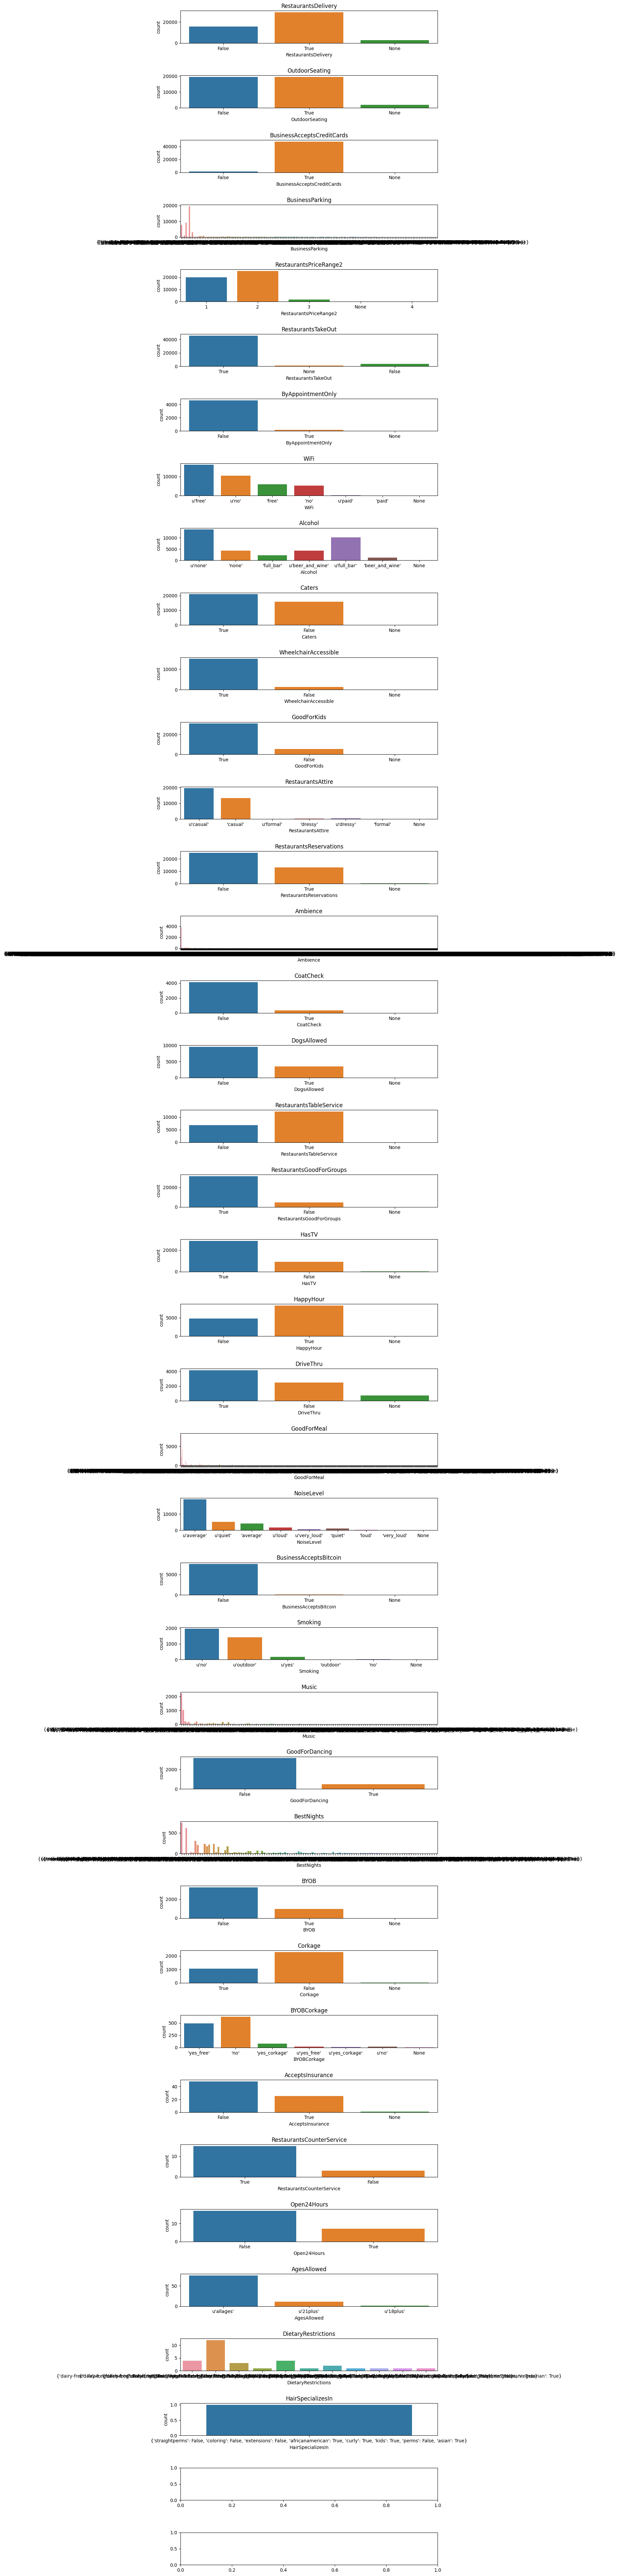

In [94]:
# Graficando algunos campos y sus categorias


#columnas = ['RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 
#            'OutdoorSeating', 'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV']

columnas =['RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BusinessParking', 
#        'BikeParking', 
        'RestaurantsPriceRange2',
       'RestaurantsTakeOut', 'ByAppointmentOnly', 'WiFi', 'Alcohol', 'Caters',
       'WheelchairAccessible', 'GoodForKids', 'RestaurantsAttire',
       'RestaurantsReservations', 'Ambience', 'CoatCheck', 'DogsAllowed',
       'RestaurantsTableService', 'RestaurantsGoodForGroups', 'HasTV',
       'HappyHour', 'DriveThru', 'GoodForMeal', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing',
       'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage', 'AcceptsInsurance',
       'RestaurantsCounterService', 'Open24Hours', 'AgesAllowed',
       'DietaryRestrictions', 'HairSpecializesIn']


#columnas =['RestaurantsTakeOut', 'BusinessAcceptsCreditCards',
#            'RestaurantsDelivery', 'OutdoorSeating',
#            'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV', 'A_M_Monday',
#            'A_T_Monday', 'A_N_Monday', 'A_M_Tuesday', 'A_T_Tuesday', 'A_N_Tuesday',
#            'A_M_Wednesday', 'A_T_Wednesday', 'A_N_Wednesday', 'A_M_Thursday',
#            'A_T_Thursday', 'A_N_Thursday', 'A_M_Friday', 'A_T_Friday',
#            'A_N_Friday', 'A_M_Saturday', 'A_T_Saturday', 'A_N_Saturday',
#            'A_M_Sunday', 'A_T_Sunday', 'A_N_Sunday']



fig, ax = plt.subplots(nrows=40, ncols=1, figsize=(10,100))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas):
    sns.countplot(x=col, data=df_attributes, ax=ax[i])
    ax[i].set_title(col)

In [82]:
df_attributes['Smoking'].isna().sum()

51227

### Seleccionando Atributos a Desanidar de la columna 'attributes'.Criterio de Selección: columnas con menor cantidad de valores nulos (Las 10 primeras de la lista anterior).

In [131]:
### Seleccionando Columnas de Atributos con Menor Cantidad de Valores Nulos (Creo que son Campos sin información)
                                                     # Cantidad NaN
Atributos_Seleccionados = ['RestaurantsTakeOut',        #   3954
#    'BusinessParking',                                  #   5589
    'BusinessAcceptsCreditCards',                       #   5982
    'RestaurantsDelivery',                              #   7236
#    'RestaurantsPriceRange2',                           #   7767
    'OutdoorSeating',                                   #   14176
    'BikeParking',                                      #   14423
    'RestaurantsReservations',                          #   16520
    'WiFi',                                             #   16721
    'HasTV',                                            #   16987
    'GoodForKids',                                      #   16525
    'RestaurantsGoodForGroups',                         #   16751                                                  
]

# Desanidar solo las claves seleccionadas
for atributo in Atributos_Seleccionados:
    df_ML[atributo] = df_ML['attributes'].apply(lambda x: x.get(atributo))

# Eliminar la columna 'attributes' original
df_ML = df_ML.drop(['attributes'], axis=1)

df_ML

/var/tmp/ipykernel_100506/3015319879.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML[atributo] = df_ML['attributes'].apply(lambda x: x.get(atributo))
/var/tmp/ipykernel_100506/3015319879.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML[atributo] = df_ML['attributes'].apply(lambda x: x.get(atributo))
/var/tmp/ipykernel_100506/3015319879.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,business_id,name,address,city,state,latitude,longitude,stars,review_count,hours,...,RestaurantsTakeOut,BusinessAcceptsCreditCards,RestaurantsDelivery,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,GoodForKids,RestaurantsGoodForGroups
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",...,True,False,False,False,True,None,u'free',None,None,None
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,40.338183,-75.471659,4.5,13,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",...,True,True,None,None,True,None,None,None,True,None
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,36.269593,-87.058943,2.0,6,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",...,True,True,True,True,False,False,u'no',True,True,True
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,36.208102,-86.768170,1.5,10,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",...,True,True,True,True,None,False,u'no',True,True,False
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,27.955269,-82.456320,4.0,10,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",...,None,None,None,None,None,False,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,43.615401,-116.284689,4.0,33,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '...",...,False,True,False,True,True,False,'free',False,True,True
150328,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,PA,32.409552,-110.943073,4.5,41,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",...,True,True,False,True,True,None,'free',None,None,None
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,MO,39.935982,-75.158665,4.5,35,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",...,True,True,True,False,True,False,u'free',True,True,True
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,PA,39.856185,-75.427725,4.5,14,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",...,True,True,False,None,True,None,None,None,None,None


In [132]:
df_ML.shape

(49640, 22)

La nueva columna anidada 'BusinessParking' se analizará al momento de ejecutar el modelo de ML

### 1.3) Desanidando la columnas 'hours'

In [134]:
### Visualizando Columnas a lo ancho
Columnas = ['hours']
DataSets = ['df_ML']
VisualizandoColumnas = VisualizarColumnas(Columnas,DataSets)

3                {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}
4                                                        {'Wednesday': '14:0-22:0', 'Thursday': '16:0-22:0', 'Friday': '12:0-22:0', 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0'}
5                  {'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', 'Wednesday': '6:0-22:0', 'Thursday': '6:0-22:0', 'Friday': '9:0-0:0', 'Saturday': '9:0-22:0', 'Sunday': '8:0-22:0'}
9                 {'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', 'Wednesday': '6:0-21:0', 'Thursday': '6:0-16:0', 'Friday': '6:0-16:0', 'Saturday': '6:0-17:0', 'Sunday': '6:0-21:0'}
11         {'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0', 'Wednesday': '11:0-14:0', 'Thursday': '11:0-14:0', 'Friday': '11:0-14:0', 'Saturday': '5:0-10:0', 'Sunday': '15:0-18:0'}
                                                                                            ...     

### Creando un DataSet para Dasanidar la columna 'hours'

In [135]:
### Creando un DataSet para Dasanidar la columna 'hours'
df_business_horario = df_ML[['business_id','hours']]

# Desanidar la columna 'hours'
df_business_horario = pd.concat([df_business_horario.drop(['hours'], axis=1), df_business_horario['hours'].apply(pd.Series)], axis=1)

df_business_horario

,business_id,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
3,MTSW4McQd7CbVtyjqoe9mw,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
5,CF33F8-E6oudUQ46HnavjQ,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
9,bBDDEgkFA1Otx9Lfe7BZUQ,0:0-0:0,6:0-21:0,6:0-21:0,6:0-16:0,6:0-16:0,6:0-17:0,6:0-21:0
11,eEOYSgkmpB90uNA7lDOMRA,11:0-14:0,11:0-14:0,11:0-14:0,11:0-14:0,11:0-14:0,5:0-10:0,15:0-18:0
...,...,...,...,...,...,...,...,...
150327,cM6V90ExQD6KMSU3rRB5ZA,0:0-0:0,0:0-17:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
150328,1jx1sfgjgVg0nM6n3p0xWA,0:0-0:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-15:0,6:0-15:0
150336,WnT9NIzQgLlILjPT0kEcsQ,11:0-22:0,11:0-22:0,NaN,11:0-22:0,11:0-2:0,11:0-2:0,11:0-22:0
150339,2O2K6SXPWv56amqxCECd4w,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0


Suponiendo que los valores nulos del datasets 'df_business_horario' corresponde a que los negocios estan cerrados. Se procede a imputar por "0:0-0:0" , indicando que estan cerrados.

### Reemplazar los valores nulos (horario cerrado) con "0:0-0:0"

In [136]:
### Reemplazar los valores nulos (horario cerrado) con "0:0-0:0"
df_business_horario = df_business_horario.fillna("0:0-0:0")
df_business_horario

,business_id,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
3,MTSW4McQd7CbVtyjqoe9mw,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,0:0-0:0,0:0-0:0,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
5,CF33F8-E6oudUQ46HnavjQ,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
9,bBDDEgkFA1Otx9Lfe7BZUQ,0:0-0:0,6:0-21:0,6:0-21:0,6:0-16:0,6:0-16:0,6:0-17:0,6:0-21:0
11,eEOYSgkmpB90uNA7lDOMRA,11:0-14:0,11:0-14:0,11:0-14:0,11:0-14:0,11:0-14:0,5:0-10:0,15:0-18:0
...,...,...,...,...,...,...,...,...
150327,cM6V90ExQD6KMSU3rRB5ZA,0:0-0:0,0:0-17:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
150328,1jx1sfgjgVg0nM6n3p0xWA,0:0-0:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-15:0,6:0-15:0
150336,WnT9NIzQgLlILjPT0kEcsQ,11:0-22:0,11:0-22:0,0:0-0:0,11:0-22:0,11:0-2:0,11:0-2:0,11:0-22:0
150339,2O2K6SXPWv56amqxCECd4w,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0


In [137]:
df_business_horario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49640 entries, 3 to 150340
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  49640 non-null  object
 1   Monday       49640 non-null  object
 2   Tuesday      49640 non-null  object
 3   Wednesday    49640 non-null  object
 4   Thursday     49640 non-null  object
 5   Friday       49640 non-null  object
 6   Saturday     49640 non-null  object
 7   Sunday       49640 non-null  object
dtypes: object(8)
memory usage: 3.4+ MB


### Se procede a unir el dataframe de horarios al dataframe de ML

In [138]:
### Reemplazar los valores nulos (horario cerrado) con "0:0-0:0"

# Realiza una fusión (merge) utilizando la columna 'business_id' como clave
df_ML = df_ML.merge(df_business_horario, on='business_id', how='inner')

# 'merged_df' contendrá la unión de ambos DataFrames por la columna 'business_id'

df_ML

,business_id,name,address,city,state,latitude,longitude,stars,review_count,hours,...,HasTV,GoodForKids,RestaurantsGoodForGroups,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",...,None,None,None,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,40.338183,-75.471659,4.5,13,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",...,None,True,None,0:0-0:0,0:0-0:0,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,36.269593,-87.058943,2.0,6,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",...,True,True,True,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,36.208102,-86.768170,1.5,10,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",...,True,True,False,0:0-0:0,6:0-21:0,6:0-21:0,6:0-16:0,6:0-16:0,6:0-17:0,6:0-21:0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,27.955269,-82.456320,4.0,10,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",...,None,None,None,11:0-14:0,11:0-14:0,11:0-14:0,11:0-14:0,11:0-14:0,5:0-10:0,15:0-18:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49635,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,43.615401,-116.284689,4.0,33,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '...",...,False,True,True,0:0-0:0,0:0-17:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
49636,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,PA,32.409552,-110.943073,4.5,41,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",...,None,None,None,0:0-0:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-15:0,6:0-15:0
49637,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,MO,39.935982,-75.158665,4.5,35,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",...,True,True,True,11:0-22:0,11:0-22:0,0:0-0:0,11:0-22:0,11:0-2:0,11:0-2:0,11:0-22:0
49638,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,PA,39.856185,-75.427725,4.5,14,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",...,None,None,None,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0


In [139]:
### Se procede a eliminar la columnas 'hours'
df_ML.drop(columns=['hours'], inplace=True)

In [140]:
df_ML.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'latitude',
       'longitude', 'stars', 'review_count', 'Categoria1', 'SubCategorias',
       'RestaurantsTakeOut', 'BusinessAcceptsCreditCards',
       'RestaurantsDelivery', 'OutdoorSeating', 'BikeParking',
       'RestaurantsReservations', 'WiFi', 'HasTV', 'GoodForKids',
       'RestaurantsGoodForGroups', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [141]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49640 entries, 0 to 49639
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 49640 non-null  object 
 1   name                        49640 non-null  object 
 2   address                     49640 non-null  object 
 3   city                        49640 non-null  object 
 4   state                       49640 non-null  object 
 5   latitude                    49640 non-null  float64
 6   longitude                   49640 non-null  float64
 7   stars                       49640 non-null  float64
 8   review_count                49640 non-null  int64  
 9   Categoria1                  49629 non-null  object 
 10  SubCategorias               49640 non-null  object 
 11  RestaurantsTakeOut          46181 non-null  object 
 12  BusinessAcceptsCreditCards  44033 non-null  object 
 13  RestaurantsDelivery         430

### Guardando el Datasets para el ML: 'df_business_yelp_ML'

In [ ]:
### Respaldando archivo en formato 'PARQUET'
Ubicacion = "gs://gmy/Datasets_ML"
NombreDelArchivo = 'df_business_yelp_ML'
Extension = '.parquet'
file = os.path.join(Ubicacion, NombreDelArchivo) + Extension
df_ML.to_parquet(file)

In [144]:
### Respaldando archivo en formato 'PARQUET'
Ubicacion = "gs://gmy/eda"
NombreDelArchivo = 'df_business_yelp_ML'
Extension = '.parquet'
file = os.path.join(Ubicacion, NombreDelArchivo) + Extension
df_ML.to_parquet(file)

### FIN